**Note:** This notebook should reside in the base directory of the BBDC folder. It exports two files that need to be moved to the root folder of your google drive and can then be used via the following colab notebook.

https://colab.research.google.com/drive/1c8VdZIeH984gPb-iU-HW28iT3noiJLVx?usp=sharing

## 1. Imports

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy import signal
from tqdm import tqdm

tqdm.pandas() # progbar

## 2. Load and structure data

In [2]:
# Fills df with data from corresponding csv
def filename_to_data(name):
    return np.genfromtxt(name,dtype='float32',delimiter=',')

In [3]:
# Fills df with sequence len information
def get_sequence_len(data):
    return len(data)

In [4]:
# Read Train.csv into df
df = pd.read_csv('train.csv',delimiter=',')

In [5]:
# Drop Subject column
df = df.drop('Subject',axis=1)

In [6]:
# Drop rows with lay label
df = df[df['Label'] != 'lay'].reset_index(drop=True)

In [7]:
# (Optional) Introduce sample size to reduce computational effort
#df = df.sample(frac=0.6)

In [7]:
# Fill column with trial values (Might take longer to run)
df['Data'] = df['Datafile'].progress_apply(filename_to_data)

100%|██████████████████████████████████████████████████████████████████████████████| 6385/6385 [05:39<00:00, 18.82it/s]


In [8]:
# Fill column with sequence lenghts
df['Sequence_Len'] = df['Data'].apply(get_sequence_len)

In [9]:
# Drop datafile column
df = df.drop('Datafile',axis=1)

In [10]:
# Check for missing values
df['Data'].isnull().values.any()

False

In [11]:
# Show resulting df
df
#df["Sequence_Len"].plot(kind='hist',bins=200,xlabel="Sequence Length",figsize=(8,3))

,Label,Data,Sequence_Len
0,curve-left-step,"[[32688.0, 32224.0, 32991.0, 32609.0, 32790.0,...",6159
1,curve-left-step,"[[32750.0, 33020.0, 32847.0, 32851.0, 33037.0,...",5569
2,stand-to-sit,"[[31757.0, 33366.0, 32687.0, 33189.0, 33099.0,...",2589
3,curve-right-spin-Rfirst,"[[32774.0, 31487.0, 32687.0, 33008.0, 33373.0,...",2239
4,jump-one-leg,"[[32939.0, 32719.0, 33046.0, 33272.0, 33516.0,...",1219
...,...,...,...
6380,curve-left-spin-Rfirst,"[[32760.0, 32999.0, 32731.0, 33297.0, 32929.0,...",1739
6381,jump-one-leg,"[[32742.0, 31961.0, 32460.0, 32736.0, 33443.0,...",2199
6382,jump-two-leg,"[[32612.0, 32851.0, 32840.0, 32826.0, 33758.0,...",1419
6383,curve-right-step,"[[32223.0, 33791.0, 33063.0, 32605.0, 33150.0,...",4289


In [12]:
# Show proportion of labels and subjects

print(df["Subject"].value_counts())
print("\n")
print(df["Label"].value_counts())

KeyError: 'Subject'

## 3. Data exploration

### 3.1. Visualize sensor values

In here you can choose to portray the the raw sensor data.

In [13]:
# Get labels
labels = df['Label'].unique()
results = [] # used to save stacked arrays for each label

# Get stacked arrays
for _, label in enumerate(tqdm(labels)):

    # get values per label
    value_array=df.loc[df['Label'] == label, "Data"].to_numpy()

    # stack arrays and save in new array
    result = value_array[0]

    for arr in value_array[1:]:
        result = np.vstack([result, arr])
        
    results.append(result)
    
print(f'Number of labels: {len(labels)}')


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [01:44<00:00,  4.76s/it]

Number of labels: 22


In [14]:
# create Label dict
label_dict = dict.fromkeys(label for label in labels)
label_dict.update((k, i) for i, k in enumerate(label_dict))

print(f"Available labels: \n\n {labels}")

Available labels: 

 ['curve-left-step' 'stand-to-sit' 'curve-right-spin-Rfirst' 'jump-one-leg'
 'lateral-shuffle-right' 'curve-right-spin-Lfirst' 'v-cut-right-Lfirst'
 'stair-down' 'v-cut-left-Rfirst' 'v-cut-right-Rfirst' 'jump-two-leg'
 'sit' 'stair-up' 'curve-right-step' 'sit-to-stand' 'run'
 'v-cut-left-Lfirst' 'stand' 'curve-left-spin-Lfirst' 'walk'
 'curve-left-spin-Rfirst' 'lateral-shuffle-left']


Label: sit


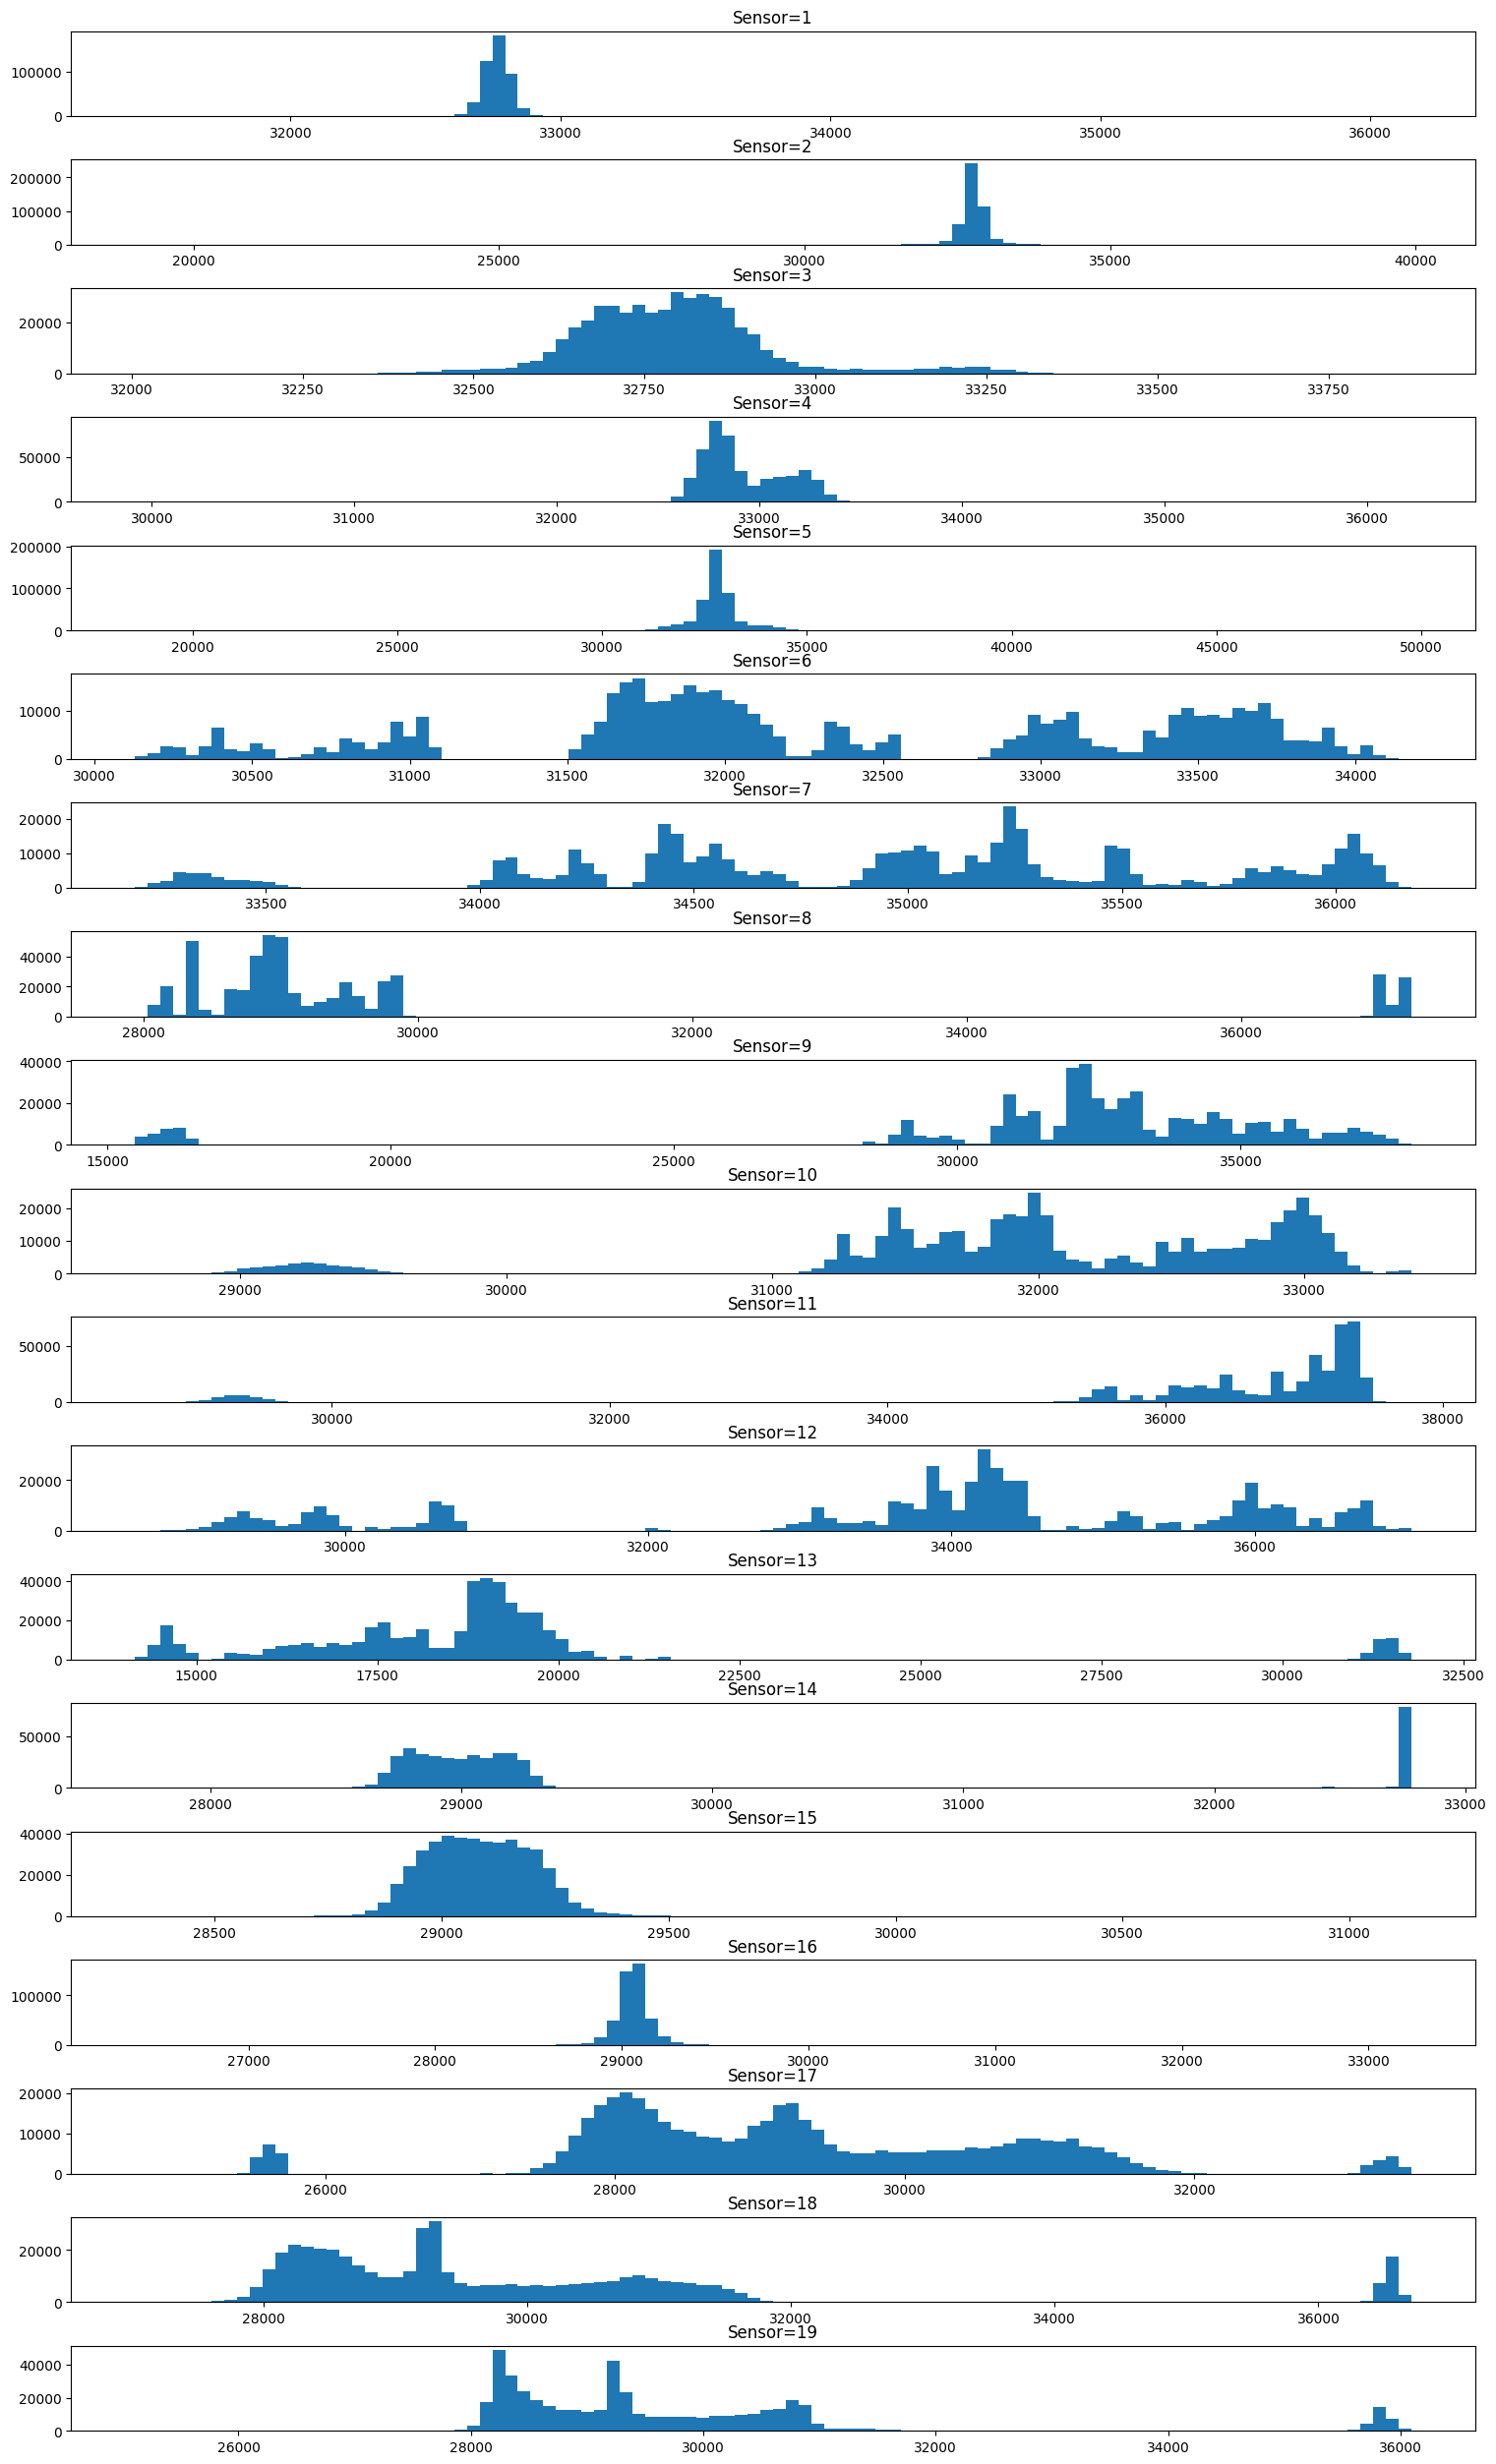

In [20]:
# choose label
lb = 'sit'

# define grid
print(f'Label: {lb}')
fig, axs = plt.subplots(nrows=19, ncols=1, figsize=(15, 25))
fig.tight_layout()

# create plot
for idx, ax in enumerate(axs.ravel()):
    n_bins = 100
    ax.hist(results[label_dict[lb]][:, idx], bins=n_bins, histtype='bar')
    ax.set_title(f'Sensor={idx+1}')
    
plt.savefig('sit.png')

### 3.3 Mean sequence lenght

In [16]:
# in total
print(f'Overall mean sequence lenght: {df["Sequence_Len"].mean()}')

Overall mean sequence lenght: 2560.343461237275


In [17]:
# per label
print('Mean sequence length per label: \n')
for label in labels:

    # get values per label
    sl = df.loc[df['Label'] == label, 'Sequence_Len']
    print(f'{label} --> {sl.mean()}')

Mean sequence length per label: 

curve-left-step --> 4354.652173913043
stand-to-sit --> 1958.4359861591695
curve-right-spin-Rfirst --> 1730.5666666666666
jump-one-leg --> 1703.089605734767
lateral-shuffle-right --> 2923.1516245487364
curve-right-spin-Lfirst --> 1860.4584717607972
v-cut-right-Lfirst --> 1809.5433333333333
stair-down --> 4352.093525179856
v-cut-left-Rfirst --> 1903.5714285714287
v-cut-right-Rfirst --> 1851.5785714285714
jump-two-leg --> 1984.1785714285713
sit --> 1614.6401384083044
stair-up --> 4804.46762589928
curve-right-step --> 4456.050847457627
sit-to-stand --> 1853.2560553633218
run --> 3174.83
v-cut-left-Lfirst --> 1831.5666666666666
stand --> 1559.9411764705883
curve-left-spin-Lfirst --> 1626.107142857143
walk --> 4316.22
curve-left-spin-Rfirst --> 1831.340625
lateral-shuffle-left --> 2888.7163120567375


## 4. Encode labels

Refer to https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. This encodes the labels into numerical categories. 

**As a little sidenote, the encoded labels do not refer to the order found in the labels array created earlier.**
**Also we need to make sure that we keep track of the assignments when later classifying the actions. It is currently not sure whether the encoded labels stay the same for each rerun on different sample sizes**

In [17]:
# Encode categorically
le = LabelEncoder()
df["Label_Encoded"] = le.fit_transform(df.Label.values)

In [18]:
df

,Label,Data,Sequence_Len,Label_Encoded
0,curve-left-step,"[[32688.0, 32224.0, 32991.0, 32609.0, 32790.0,...",6159,2
1,curve-left-step,"[[32750.0, 33020.0, 32847.0, 32851.0, 33037.0,...",5569,2
2,stand-to-sit,"[[31757.0, 33366.0, 32687.0, 33189.0, 33099.0,...",2589,16
3,curve-right-spin-Rfirst,"[[32774.0, 31487.0, 32687.0, 33008.0, 33373.0,...",2239,4
4,jump-one-leg,"[[32939.0, 32719.0, 33046.0, 33272.0, 33516.0,...",1219,6
...,...,...,...,...
6380,curve-left-spin-Rfirst,"[[32760.0, 32999.0, 32731.0, 33297.0, 32929.0,...",1739,1
6381,jump-one-leg,"[[32742.0, 31961.0, 32460.0, 32736.0, 33443.0,...",2199,6
6382,jump-two-leg,"[[32612.0, 32851.0, 32840.0, 32826.0, 33758.0,...",1419,7
6383,curve-right-step,"[[32223.0, 33791.0, 33063.0, 32605.0, 33150.0,...",4289,5


## 5. Export train data

In [19]:
# Reorganize df
df = df[['Label','Label_Encoded','Data','Sequence_Len']]

In [20]:
# reset index
df.reset_index(drop=True,inplace=True)

In [21]:
# show final df
df

,Label,Label_Encoded,Data,Sequence_Len
0,curve-left-step,2,"[[32688.0, 32224.0, 32991.0, 32609.0, 32790.0,...",6159
1,curve-left-step,2,"[[32750.0, 33020.0, 32847.0, 32851.0, 33037.0,...",5569
2,stand-to-sit,16,"[[31757.0, 33366.0, 32687.0, 33189.0, 33099.0,...",2589
3,curve-right-spin-Rfirst,4,"[[32774.0, 31487.0, 32687.0, 33008.0, 33373.0,...",2239
4,jump-one-leg,6,"[[32939.0, 32719.0, 33046.0, 33272.0, 33516.0,...",1219
...,...,...,...,...
6380,curve-left-spin-Rfirst,1,"[[32760.0, 32999.0, 32731.0, 33297.0, 32929.0,...",1739
6381,jump-one-leg,6,"[[32742.0, 31961.0, 32460.0, 32736.0, 33443.0,...",2199
6382,jump-two-leg,7,"[[32612.0, 32851.0, 32840.0, 32826.0, 33758.0,...",1419
6383,curve-right-step,5,"[[32223.0, 33791.0, 33063.0, 32605.0, 33150.0,...",4289


In [22]:
# grab desired data
labels = df['Label_Encoded'].values
series = df['Data'].values

In [23]:
assert len(labels) == len(series)

In [26]:
def pad_series(x,max_len):

    t = max_len - len(x)

    return np.pad(x, (0,max(0,t)), mode='constant')

# Create dataset (same length with padding)
def create_dataset_pad(series):

    # Create windows
    for i, s in enumerate(tqdm(series)):
        series[i] = pad_series(s,8019)
        
    return series

In [ ]:
res = create_dataset_pad(series)

  2%|██▌                                                                                                                        | 135/6385 [01:17<1:44:33,  1.00s/it]

In [25]:
# save data to files
filepath = os.getcwd()+r'\DataPreprocessed' 
if not os.path.exists(filepath):
    os.makedirs(filepath)
    
np.savez_compressed(filepath+'\data_preprocessed_full.npz', a=labels, b=series,allow_pickle=True)

print("Export sucessful!")

Export sucessful!


## 6. Export validation data

In [42]:
# Build df
df_valid = pd.read_csv('challenge_labels.csv',delimiter=',')
df_valid = df_valid.drop('Subject',axis=1)
df_valid = df_valid[df_valid['Label'] != 'lay'].reset_index(drop=True)
df_valid['Data'] = df_valid['Datafile'].progress_apply(filename_to_data)
df_valid = df_valid.drop('Datafile',axis=1)

# Encode
le = LabelEncoder()
df_valid["Label_Encoded"] = le.fit_transform(df_valid.Label.values) # Make sure this does not cause problem with test data
df_valid = df_valid[['Label','Label_Encoded','Data']]
df_valid.reset_index(drop=True,inplace=True)

# Grab
labels_valid = df_valid['Label_Encoded'].values
series_valid = df_valid['Data'].values

# Export
filepath = os.getcwd()+r'\DataPreprocessed' 
if not os.path.exists(filepath):
    os.makedirs(filepath)
    
np.savez_compressed(filepath+r'\valid_data_preprocessed.npz', a=labels_valid, b=series_valid,allow_pickle=True)

print("Export sucessful!")

100%|██████████████████████████████████████████████████████████████████████████████| 1738/1738 [02:24<00:00, 12.05it/s]


Export sucessful!
